In [ ]:
%cd ../

In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz')

In [6]:
dtfa = DTFA.DeepTFA([b for b in lepping_db.all() if 'response' not in b.task and 'tones' not in b.task],
                    mask='/home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz', num_factors=100, embedding_dim=2)

05/21/2020 13:02:59 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/21/2020 13:03:00 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run2_music_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/21/2020 13:03:01 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/21/2020 13:03:03 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run5_nonmusic_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sou

In [7]:
dtfa.num_blocks

618

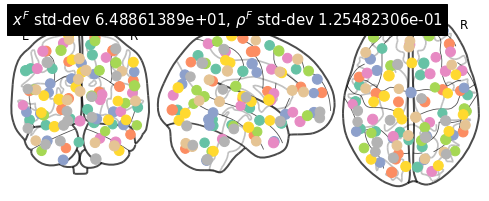

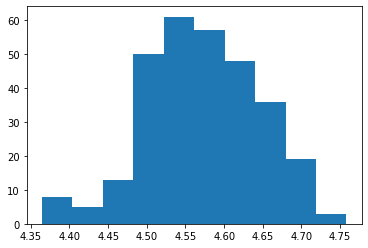

(<nilearn.plotting.displays.OrthoProjector at 0x7f080471a510>,
 tensor([[ 12.8145, -65.1945,  53.2321],
         [ 14.5453,  22.5561, -17.8521],
         [-10.6344, -50.0528, -13.8620],
         [ 10.8530,  10.0938,  63.9090],
         [-57.3896, -17.9935,  36.6814],
         [ 60.5445, -10.8247,  -1.8906],
         [-53.1801,  -0.5118, -14.9774],
         [  7.8306, -86.7856,  -4.1272],
         [-52.1891, -46.5007,  39.0553],
         [-36.1157, -49.1855, -20.6284],
         [-29.3329,  38.0106,  38.7881],
         [ 34.0938, -30.0992, -19.7698],
         [ -1.4865, -58.3203, -38.5116],
         [ 41.3649,  42.8692,  19.9855],
         [-12.1786, -72.7192,  46.2530],
         [ 55.8660, -49.8648,  26.2635],
         [ 52.9240,  -6.4770, -30.4956],
         [-12.1432, -18.1247,   7.4596],
         [-35.8349,  -9.1570,  57.2650],
         [ 15.5524, -17.9654,  71.4509],
         [-14.9925, -78.6239, -44.7372],
         [ 19.8969,  64.9552,  14.1927],
         [-53.4665,   7.9703,  15.5

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-2}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=20,
                    train_globals=True, blocks_filter=lepping_db.inference_filter(training=True, held_out_tasks=set(['tones', 'response'])))

05/21/2020 13:07:39 [Epoch 1] (11260ms) Posterior free-energy 1.72790600e+10 = KL from prior 1.00453900e+07 - log-likelihood -1.72690145e+10
05/21/2020 13:07:39 Saving checkpoint...
05/21/2020 13:07:50 [Epoch 2] (11095ms) Posterior free-energy 1.69744722e+10 = KL from prior 2.13471425e+06 - log-likelihood -1.69723372e+10
05/21/2020 13:08:01 [Epoch 3] (10989ms) Posterior free-energy 1.67285289e+10 = KL from prior 9.54639625e+05 - log-likelihood -1.67275756e+10
05/21/2020 13:08:12 [Epoch 4] (10996ms) Posterior free-energy 1.65044603e+10 = KL from prior 8.04228500e+05 - log-likelihood -1.65036595e+10
05/21/2020 13:08:23 [Epoch 5] (10971ms) Posterior free-energy 1.63223941e+10 = KL from prior 7.73234562e+05 - log-likelihood -1.63216200e+10
05/21/2020 13:08:34 [Epoch 6] (10992ms) Posterior free-energy 1.61624781e+10 = KL from prior 7.54108438e+05 - log-likelihood -1.61617265e+10
05/21/2020 13:08:45 [Epoch 7] (11008ms) Posterior free-energy 1.60346798e+10 = KL from prior 7.43915562e+05 - log

Epoch   659: reducing learning rate of group 0 to 5.0000e-03.
Epoch   659: reducing learning rate of group 1 to 5.0000e-03.
Epoch   659: reducing learning rate of group 2 to 5.0000e-03.
Epoch   659: reducing learning rate of group 3 to 5.0000e-03.


05/21/2020 15:09:08 [Epoch 661] (10982ms) Posterior free-energy 1.10283397e+10 = KL from prior 2.43987425e+06 - log-likelihood -1.10259016e+10
05/21/2020 15:09:19 [Epoch 662] (10981ms) Posterior free-energy 1.10164777e+10 = KL from prior 2.43796450e+06 - log-likelihood -1.10140416e+10
05/21/2020 15:09:30 [Epoch 663] (10992ms) Posterior free-energy 1.10150216e+10 = KL from prior 2.43659825e+06 - log-likelihood -1.10125855e+10
05/21/2020 15:09:41 [Epoch 664] (10980ms) Posterior free-energy 1.10144840e+10 = KL from prior 2.43866900e+06 - log-likelihood -1.10120448e+10
05/21/2020 15:09:52 [Epoch 665] (10995ms) Posterior free-energy 1.10143017e+10 = KL from prior 2.43691500e+06 - log-likelihood -1.10118646e+10
05/21/2020 15:10:03 [Epoch 666] (11026ms) Posterior free-energy 1.10140099e+10 = KL from prior 2.43829075e+06 - log-likelihood -1.10115717e+10
05/21/2020 15:10:14 [Epoch 667] (10989ms) Posterior free-energy 1.10136955e+10 = KL from prior 2.43756975e+06 - log-likelihood -1.10112563e+10

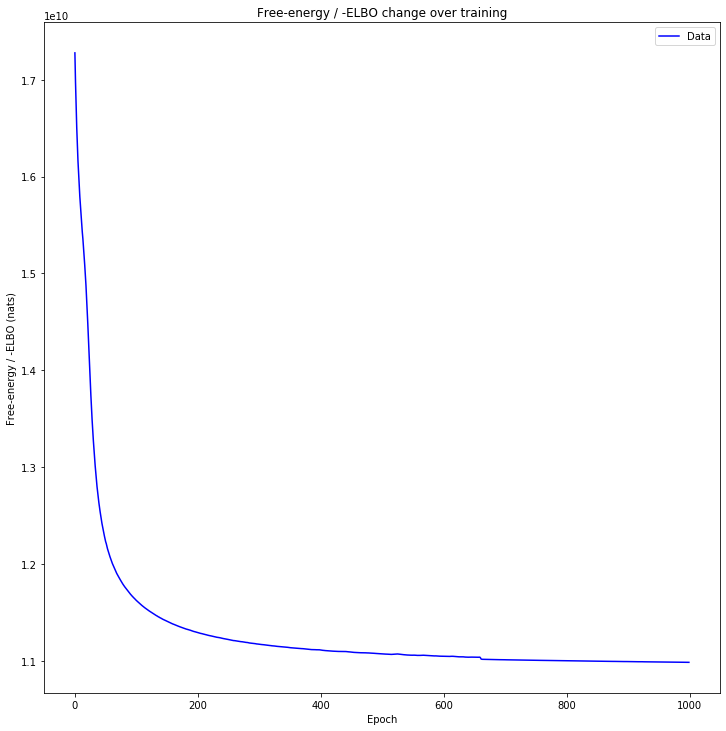

In [10]:
utils.plot_losses(losses)

In [11]:
def subject_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [12]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'Negative music'
    elif task == 'positive_music':
        task = 'Positive music'
    elif task == 'negative_nonmusic':
        task = 'Negative sounds'
    elif task == 'positive_nonmusic':
        task = 'Positive sounds'
    else:
        task = task.capitalize()
    return task

In [13]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.subject)
    return subject + ', ' + task + ' stimulus'

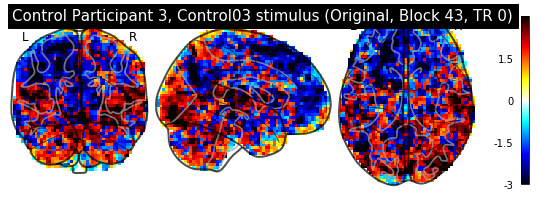

05/21/2020 16:11:29 Reconstruction Error (Frobenius Norm): 1.46234375e+02 out of 9.03519043e+02


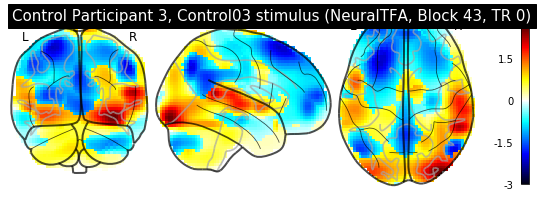

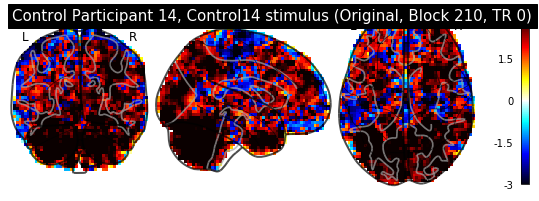

05/21/2020 16:11:32 Reconstruction Error (Frobenius Norm): 2.09434464e+02 out of 8.98639954e+02


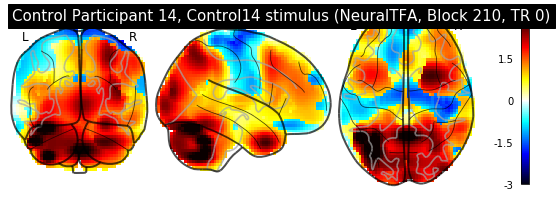

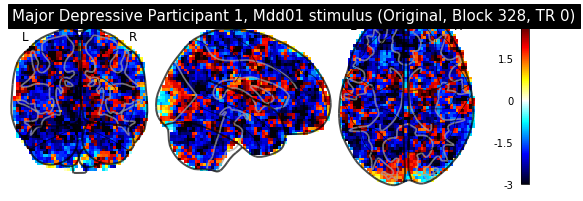

05/21/2020 16:11:34 Reconstruction Error (Frobenius Norm): 1.36962738e+02 out of 8.12963074e+02


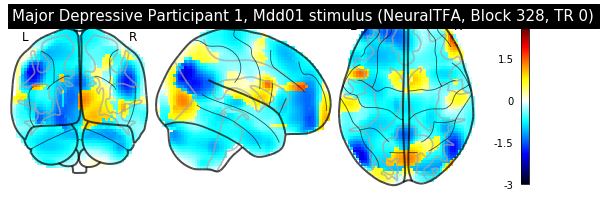

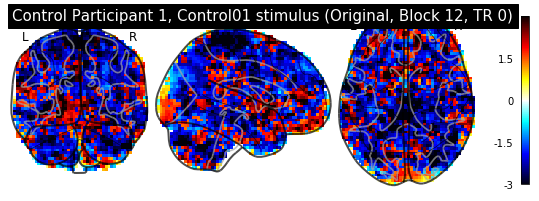

05/21/2020 16:11:37 Reconstruction Error (Frobenius Norm): 1.33767090e+02 out of 8.10916443e+02


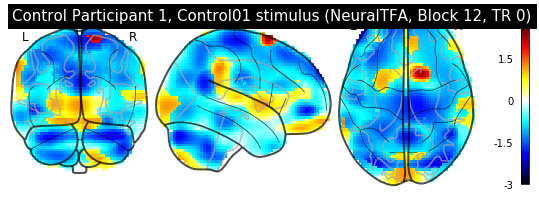

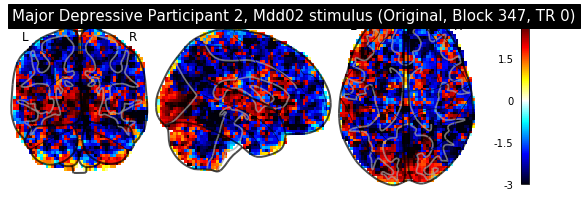

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
05/21/2020 16:11:39 Reconstruction Error (Frobenius Norm): 1.44830719e+02 out of 8.85320007e+02


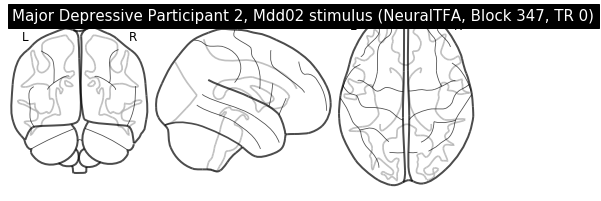

In [14]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


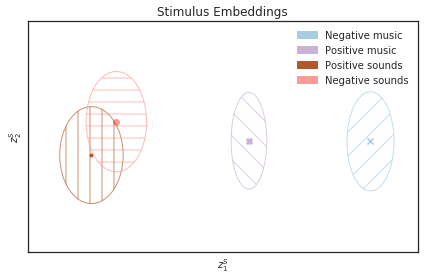

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Paired', legend_ordering=[0, 2, 3, 1])

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:152: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


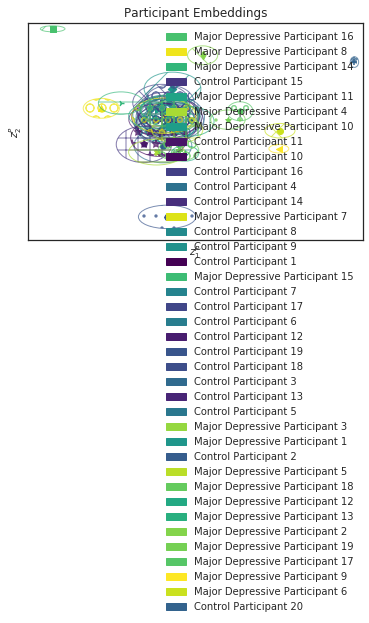

In [16]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

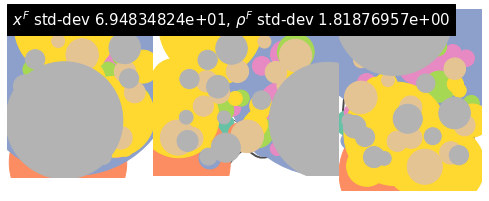

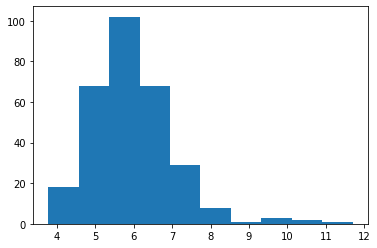

(<nilearn.plotting.displays.OrthoProjector at 0x7f07cc207c50>,
 tensor([[ 1.4038e+01, -7.2864e+01,  4.7405e+01],
         [ 3.2514e+01,  4.5367e+01, -2.3620e+01],
         [-2.3275e+00, -5.4045e+01, -1.3750e+01],
         [ 1.6967e+01,  1.1902e+01,  7.2871e+01],
         [-5.0189e+01, -1.3311e+01,  3.4098e+01],
         [ 6.1554e+01, -2.3850e+01, -1.2822e+00],
         [-4.3735e+01, -6.5873e+00, -7.5772e+00],
         [ 2.8054e+00, -9.2774e+01, -1.6131e+00],
         [-6.4092e+01, -4.0530e+01,  4.2957e+01],
         [-3.8358e+01, -7.1245e+01, -2.0031e+01],
         [-3.2965e+01,  4.4404e+01,  3.0698e+01],
         [ 3.0209e+01, -3.5851e+01, -1.7852e+01],
         [-5.0317e-01, -5.1078e+01, -3.3132e+01],
         [ 4.7980e+01,  4.3953e+01,  1.9398e+01],
         [-1.4263e+01, -7.4457e+01,  3.8736e+01],
         [ 5.4046e+01, -6.1695e+01,  4.0813e+01],
         [ 5.8068e+01, -2.0990e+01, -2.9717e+01],
         [-7.8530e+00, -2.8737e+00,  7.4058e+00],
         [-4.2741e+01, -5.6742e+00,  

In [17]:
dtfa.visualize_factor_embedding()

In [18]:
dtfa.average_reconstruction_error()

05/21/2020 16:12:10 Average reconstruction error (MSE): 9.27185842e-01
05/21/2020 16:12:10 Average data norm (Euclidean): 1.05002988e+00
05/21/2020 16:12:10 Percent average reconstruction error: 0.355429


(0.9271858416768778, 1.0500298773474526, 0.0035542941932118306)

In [19]:
def condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


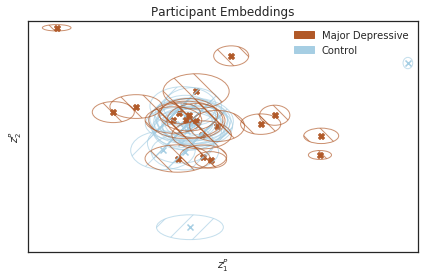

In [20]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None, colormap='Paired')

In [21]:
dtfa.average_reconstruction_error(weighted=False)

05/21/2020 16:12:39 Average reconstruction error (MSE): 7.30483488e+02 +/- 7.54513183e+01
05/21/2020 16:12:39 Average data norm (Euclidean): 8.29830948e+02 +/- 5.52383552e+01
05/21/2020 16:12:39 Percent average reconstruction error: 88.128283 +/- 8.03083635e+00


(array([ 866.74328613,  710.57208252,  741.68145752,  726.57672119,
         675.78613281,  796.51477051,  719.87072754,  817.7019043 ,
         625.99554443,  621.76898193,  636.10192871,  626.06671143,
         664.75762939,  715.48504639,  684.84204102,  674.98669434,
         836.38604736,  681.55169678,  767.07232666,  680.46618652,
         726.8059082 ,  863.61248779,  743.42999268,  856.12237549,
         695.9954834 ,  710.31341553,  705.67858887,  691.91479492,
         675.75848389,  749.40875244,  701.86022949,  726.92260742,
         771.48608398,  686.38330078,  802.23388672,  674.40936279,
         632.31640625,  818.30853271,  638.48937988,  748.11407471,
         712.28662109,  653.49700928,  699.02679443,  713.15570068,
         697.51257324,  712.52618408,  704.13378906,  733.62023926,
         835.9989624 ,  721.88146973,  819.20037842,  702.30126953,
         740.3291626 ,  884.72198486,  757.39923096,  906.78930664,
         742.72174072,  748.8291626 ,  749.31951